In [ ]:
import open3d as o3d
import numpy as np
import matplotlib.pyplot as plt
from util_functions import *
from global_vars import *


30
[[381.2322998    0.         316.14468384]
 [  0.         380.77737427 247.31758118]
 [  0.           0.           1.        ]]


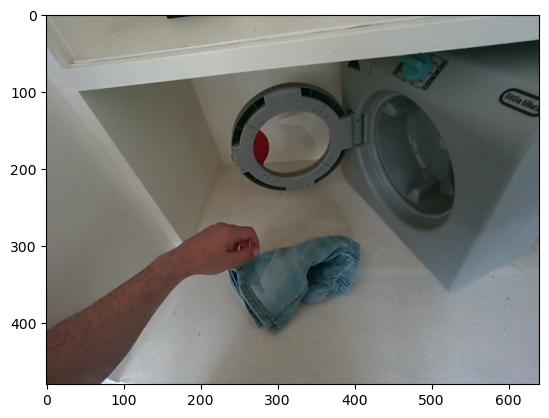

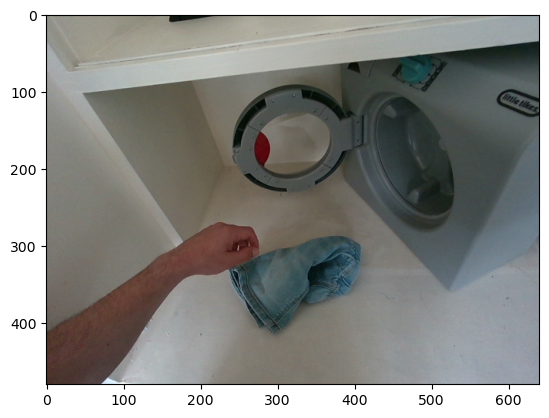

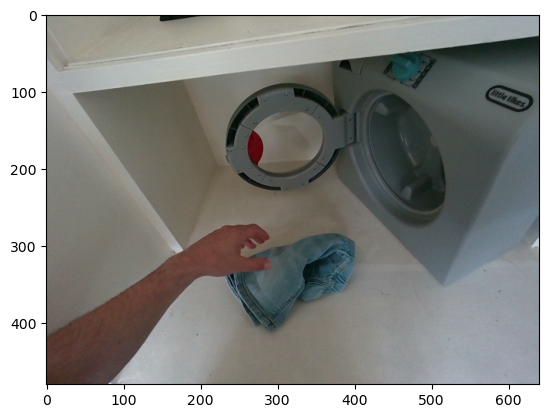

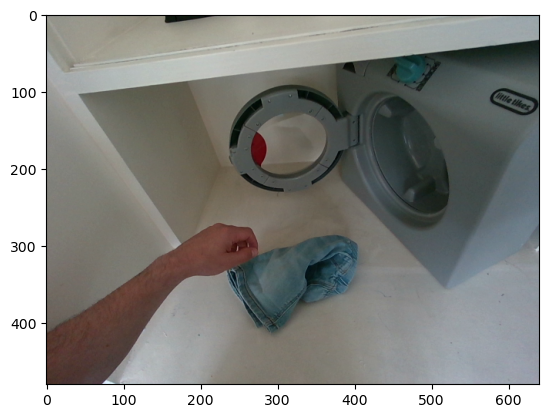

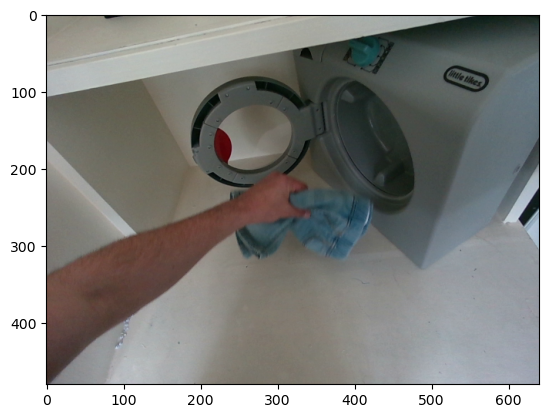

In [ ]:
# load rgbs, depths and hand joint actions
path = 'assets/cloth_in_wash_5/'
rgbs = np.load(f'{path}rgbs.npy')
depths = np.load(f'{path}depths.npy')

In [ ]:

MANO_HAND_IDS = {"wrist": 0,        "index_mcp": 1,     "index_pip": 2, 
                 "index_dip": 3,    "middle_mcp": 4,    "middle_pip": 5, 
                 "middle_dip": 6,   "pinkie_mcp": 7,    "pinkie_pip": 8, 
                 "pinkie_dip": 9,   "ring_mcp": 10,     "ring_pip": 11, 
                 "ring_dip": 12,    "thumb_mcp": 13,    "thumb_pip": 14, 
                 "thumb_dip": 15,   "thumb_tip": 16,    "index_tip": 17, 
                 "middle_tip": 18,  "ring_tip": 19,     "pinky_tip": 20}

# 17, 3, 2, 1
# if you want to understand what the dip, pip etc... corresponds to check this: https://images.app.goo.gl/RepR8HWBXTQTQoFx8

"""
the below is what you likely need. you can vizualize them
at the following cell."""
actions = np.load(f'{path}/scene_files/hand_joints_kpts_3d.npy')
rgbs = rgbs[:len(actions)] # sometimes some actions are missing because they were not extracted during processing as for some frames there were no hand present and so they are automatically discarded
depths = depths[:len(actions)]

FileNotFoundError: [Errno 2] No such file or directory: 'assets/cloth_in_wash_5//scene_files/hand_joints_kpts_3d.npy'

In [ ]:
# if you want to vizualize the hand joints, the point clouds and the scene for a frame

idx = 0 # pick the index

depth_pcds = []
hand_mesh_pcds = []
gripper_pcds = []
sphere_viz_actions = []
depth_pcds_no_stabilization = []
hand_joints = []
print(rgbs.shape[0])
for i in range(rgbs.shape[0]):
    print(i)
    frame = i
    depth_pcd = o3d.io.read_point_cloud(f"{path}/scene_files/live_image_pcd_{frame}.ply")
    # remove far away depth for visualization
    depth_pcd_np = np.asarray(depth_pcd.points)
    depth_pcd_cols = np.asarray(depth_pcd.colors)
    depth_pcd_cols = depth_pcd_cols[depth_pcd_np[:, 2] < 1]
    depth_pcd_np = depth_pcd_np[depth_pcd_np[:, 2] < 1]
    depth_pcd.points = o3d.utility.Vector3dVector(depth_pcd_np)
    depth_pcd.colors = o3d.utility.Vector3dVector(depth_pcd_cols)

    hand_mesh_pcd = o3d.io.read_triangle_mesh(f"{path}/scene_files/hand_mesh_{frame}.ply")
    gripper_pcd = o3d.io.read_point_cloud(f"{path}/scene_files/gripper_pcd_{frame}.ply")
    depth_pcds.append(depth_pcd)
    hand_mesh_pcds.append(hand_mesh_pcd)
    gripper_pcds.append(gripper_pcd)
    action = actions[i]
    sphere_viz_actions = []
    for a in actions[i]:
        sphere = o3d.geometry.TriangleMesh.create_sphere(radius=0.005)
        sphere.compute_vertex_normals()
        sphere.paint_uniform_color([0, 0, 1])
        sphere.translate(a)
        sphere_viz_actions.append(sphere)
        sphere_viz_actions.append(sphere)
    hand_joints.append(sphere_viz_actions)

# o3d.visualization.draw_geometries(gripper_pcds) # if you want to see the gripper we obtained, although maybe not very useful for you at this moment, better to predict hand keypoints
# o3d.visualization.draw([depth_pcds[idx], gripper_pcds[idx], hand_mesh_pcds[idx]])

# o3d.visualization.draw_geometries([depth_pcd] + sphere_viz_actions) # plot this if you want the points to be more visible
o3d.visualization.draw_geometries([depth_pcds[idx], gripper_pcds[idx], hand_mesh_pcds[idx]]) # if you want to see the gripper we obtained, although maybe not very useful for you at this moment, better to predict hand keypoints



30
0
1
2
3
4
5
6
7
8
9
[Open3D WARNING] Read PLY failed: unable to open file: assets/cloth_in_wash_5//scene_files/live_image_pcd_9.ply
[Open3D WARNING] Read PLY failed: unable to open file: assets/cloth_in_wash_5//scene_files/hand_mesh_9.ply
[Open3D WARNING] Read PLY failed: unable to open file: assets/cloth_in_wash_5//scene_files/gripper_pcd_9.ply
10
[Open3D WARNING] Read PLY failed: unable to open file: assets/cloth_in_wash_5//scene_files/live_image_pcd_10.ply
[Open3D WARNING] Read PLY failed: unable to open file: assets/cloth_in_wash_5//scene_files/hand_mesh_10.ply
[Open3D WARNING] Read PLY failed: unable to open file: assets/cloth_in_wash_5//scene_files/gripper_pcd_10.ply
11
[Open3D WARNING] Read PLY failed: unable to open file: assets/cloth_in_wash_5//scene_files/live_image_pcd_11.ply
[Open3D WARNING] Read PLY failed: unable to open file: assets/cloth_in_wash_5//scene_files/hand_mesh_11.ply
[Open3D WARNING] Read PLY failed: unable to open file: assets/cloth_in_wash_5//scene_files/

RPly: Unable to open file
RPly: Unable to open file
RPly: Unable to open file
RPly: Unable to open file
RPly: Unable to open file
RPly: Unable to open file
RPly: Unable to open file
RPly: Unable to open file
RPly: Unable to open file
RPly: Unable to open file
RPly: Unable to open file
RPly: Unable to open file
RPly: Unable to open file
RPly: Unable to open file
RPly: Unable to open file
RPly: Unable to open file
RPly: Unable to open file
RPly: Unable to open file
RPly: Unable to open file
RPly: Unable to open file
RPly: Unable to open file
RPly: Unable to open file
RPly: Unable to open file
RPly: Unable to open file
RPly: Unable to open file
RPly: Unable to open file
RPly: Unable to open file
RPly: Unable to open file
RPly: Unable to open file
RPly: Unable to open file
RPly: Unable to open file
RPly: Unable to open file
RPly: Unable to open file
RPly: Unable to open file
RPly: Unable to open file
RPly: Unable to open file
RPly: Unable to open file
RPly: Unable to open file
RPly: Unable